# Netflix user recommendation



To have the best recommendations for our customer, Monica Villarreal, we will apply a User based collaborative filtering.

We will, for this work, see the correlations between Monica and all the others person we have on the dataset.

We will use two different approaches to calculate the correlation : Pearson Correlation and  Cosine similarity. And we will also use two different approaches to select the top 5 movies. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Part 1 Pearson Correlation 

First, we'll load the dataset and separate the data from Monica and from the others.

In [2]:
data = pd.read_csv('Netmovies_ratings_db.csv')

data.drop(columns=['timestamp'], inplace=True)

print(data)

            userName  rating                           title
0           Tom Cook     2.5                       Rocky III
1           Tom Cook     1.0                           Greed
2           Tom Cook     4.0                    American Pie
3           Tom Cook     2.0                        My Tutor
4           Tom Cook     2.0  Jay and Silent Bob Strike Back
...              ...     ...                             ...
44989  Charles Jones     4.0                   Boogie Nights
44990  Charles Jones     4.0                          Waiter
44991  Charles Jones     3.5                A Bridge Too Far
44992  Charles Jones     4.5                  The Last Laugh
44993  Charles Jones     4.0                           Miffo

[44994 rows x 3 columns]


In [3]:
def get_user_data(userName):
    return data[data['userName']==userName]
monica = get_user_data('Monica Villarreal')
data.drop(monica.index, inplace=True)
print(monica)

              userName  rating                               title
425  Monica Villarreal     1.0                 Million Dollar Baby
426  Monica Villarreal     3.0                          Predator 2
427  Monica Villarreal     5.0  Terminator 3: Rise of the Machines
428  Monica Villarreal     4.5           Monsieur  Hulot's Holiday
429  Monica Villarreal     5.0                    Dawn of the Dead
430  Monica Villarreal     5.0                    Cutthroat Island
431  Monica Villarreal     3.0                    Or (My Treasure)
432  Monica Villarreal     3.5                              Savior
433  Monica Villarreal     3.0                  Young and Innocent
434  Monica Villarreal     5.0                          La Chienne
435  Monica Villarreal     4.0    Ring of Fire II: Blood and Steel
436  Monica Villarreal     4.0                Heart of the Country


Since we have the Monica's data, we will have the opportunity to calculate the correlation of his rating with other users. We will use the formula of pearson correlation present in 14.2 Collaborative Filtering Collaborative Filtering User-Based Collaborative Filtering: “People Like You” equation 14.1


In [4]:
users = data['userName'].unique()

correlations = {}
for user in users : 
    #select data of the user  
    user_data = get_user_data(user)

    common_movies = list(set(monica['title']).intersection(set(user_data['title'])))
    if len(common_movies) > 3:  #we need at least two common movies to compute a correlation
        monica_common = monica[monica['title'].isin(common_movies)].drop_duplicates('title').set_index('title')
        user_common = user_data[user_data['title'].isin(common_movies)].drop_duplicates('title').set_index('title')
        monica_ratings = monica_common.loc[common_movies, 'rating']
        user_ratings = user_common.loc[common_movies, 'rating']
        corr = np.corrcoef(monica_ratings, user_ratings)[0, 1]
        correlations[user] = corr
    else:
        correlations[user] = None #not enough data to compute a correlation

print(correlations)


{'Tom Cook': None, 'Katherine Stevens': None, 'Thomas Arnold': None, 'Karina Davis': None, 'Michelle Roberson': None, 'Deanna Wise': None, 'Devin Davis': None, 'Edwin Welch': None, 'Laurie Perez': None, 'Daniel Hopkins': None, 'Peter Brown': None, 'Melanie Hunter': None, 'Aimee Lee': None, 'Christopher Stevens': np.float64(0.9200129084349359), 'Timothy Ward': None, 'Maureen Hicks': np.float64(0.44022545316281186), 'Mark Duncan': None, 'Juan Ortiz': np.float64(0.17407765595569782), 'Frank Riddle': None, 'Timothy Lopez': None, 'John Miller': None, 'Sarah Rice': np.float64(0.25318484177091666), 'Rebecca Vasquez': None, 'Shannon Curtis': None, 'Christopher Morales': None, 'Marcus Cooper': None, 'Gary Hughes': None, 'Mark Silva': None, 'John Marsh': np.float64(0.8703882797784891), 'Richard Hoover': None, 'Daniel Baker': None, 'Morgan Cox': None, 'Kristina Lopez': np.float64(0.9045340337332909), 'Jesse Maynard': None, 'Michael Porter': None, 'Marvin Morrison': None, 'Deanna Bailey': None, 'C

We will now apply a threshold to identify the people that are the closest to Monica. The threshold is defined at 0.75.

In [5]:
users_selected = []

for user, corr in correlations.items():
    if corr != None :
        if corr > 0.75:
            users_selected.append((user,corr))

print(users_selected)

[('Christopher Stevens', np.float64(0.9200129084349359)), ('John Marsh', np.float64(0.8703882797784891)), ('Kristina Lopez', np.float64(0.9045340337332909)), ('April Miller', np.float64(0.8728715609439693)), ('Maria Lamb', np.float64(0.7717436331412897)), ('Dawn Cunningham', np.float64(0.8835412617927488)), ('Jamie Barker', np.float64(0.8902524557833292)), ('Chad Wheeler', np.float64(0.9684959969581861)), ('Christopher Matthews', np.float64(0.9805806756909201)), ('Justin Rocha', np.float64(0.9682458365518544)), ('Linda Lowery', np.float64(0.8164965809277259)), ('Clarence Robinson', np.float64(0.9021794621203566)), ('Robert Mason', np.float64(0.8161633231861503)), ('Kaitlyn Wolf', np.float64(0.7624928516630233)), ('Allison Scott', np.float64(0.8037073126604152)), ('Dillon Gay', np.float64(0.9446104285307815)), ('Jessica Winters', np.float64(0.8934130258980469)), ('Brendan Chang', np.float64(0.7562762600482743)), ('Ian Strickland', np.float64(0.899228803025897)), ('Derrick Schultz', np.f

Since we have too many people, we will select only a few of them.

[('Christopher Matthews', np.float64(0.9805806756909201)), ('Chad Wheeler', np.float64(0.9684959969581861)), ('Justin Rocha', np.float64(0.9682458365518544)), ('Dillon Gay', np.float64(0.9446104285307815)), ('Derrick Schultz', np.float64(0.9209903627854671)), ('Christopher Stevens', np.float64(0.9200129084349359)), ('Kristina Lopez', np.float64(0.9045340337332909)), ('Clarence Robinson', np.float64(0.9021794621203566)), ('Ian Strickland', np.float64(0.899228803025897)), ('Jessica Winters', np.float64(0.8934130258980469))]


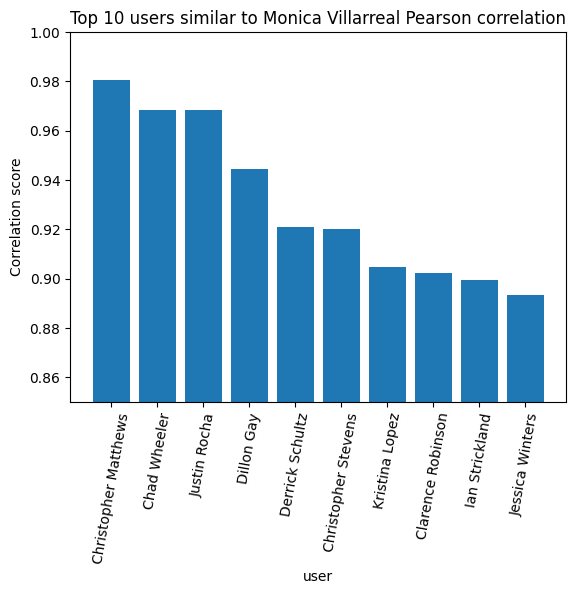

In [ ]:
users_sorted = sorted(users_selected, key=lambda x: x[1], reverse=True)
# We select the first 10  users from the sorted list
users_selected = users_sorted[:10]
print(users_selected)

user = [u for u, s in users_selected]
scores = [s for f, s in users_selected]

plt.bar(user, scores)
plt.xlabel('user')
plt.ylabel('Correlation score')
plt.title('Top 10 users similar to Monica Villarreal Pearson correlation')
plt.xticks(rotation=80)
plt.ylim(0.85, 1)
plt.show()

# Part 2 Cosine Similarity

We will try to select the top 10 closest user to Monica by calculating the cosine similarity defined in 14.2 Collaborative Filtering Collaborative Filtering 

Similar users to Monica Villarreal : {'Dillon Gay': np.float64(0.9980581358372058), 'Justin Rocha': np.float64(0.9972861568891727), 'April Miller': np.float64(0.9959895258010609), 'Brendan Chang': np.float64(0.993688195729231), 'Jeremiah Wood': np.float64(0.9930289852417019), 'Chad Wheeler': np.float64(0.991316672465359), 'Steven Roach': np.float64(0.9909006417637627), 'Kaitlyn Wolf': np.float64(0.988919386268908), 'Colleen Long': np.float64(0.9880235200593538), 'Tina Aguirre': np.float64(0.9860528618264147)}


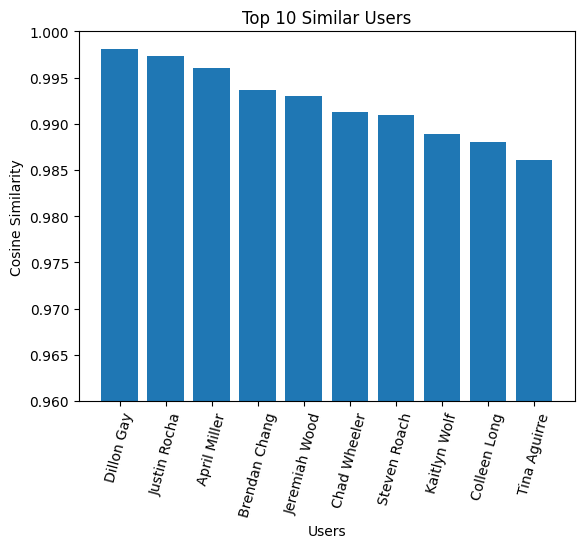

In [118]:
data_cosine = pd.read_csv("Netmovies_ratings_db.csv")

user_item_matrix = data_cosine.pivot_table(
    index="userName", 
    columns="title", 
    values="rating"
)


def get_similar_users(target_user,n=5):
    if target_user not in user_item_matrix.index:
        return f"User '{target_user}' not found."

    similarities = {}
    for other_user in user_item_matrix.index:
        if other_user == target_user:
            continue
        
        common_movies = user_item_matrix.loc[target_user].dropna().index.intersection(
                        user_item_matrix.loc[other_user].dropna().index)
        
        if len(common_movies) <4:
            continue

        v1 = user_item_matrix.loc[target_user, common_movies].to_numpy()
        v2 = user_item_matrix.loc[other_user, common_movies].to_numpy()

        numerator = np.sum(v1 * v2)
        denominator = np.sqrt(np.sum(v1**2)) * np.sqrt(np.sum(v2**2))
        
        if denominator == 0:
            sim = np.nan
        else:
            sim = numerator / denominator

        similarities[other_user] = sim

    
    similar_users = sorted(similarities, key=similarities.get,reverse=True)[:n]
    return {u: similarities[u] for u in similar_users}
    

similar_users = get_similar_users("Monica Villarreal",n=10)

print("Similar users to", "Monica Villarreal", ":", similar_users)

plt.bar(similar_users.keys(), similar_users.values(),)
plt.xlabel('Users')
plt.ylabel('Cosine Similarity')
plt.title('Top 10 Similar Users to Monica Villarreal Cosine Similarity')
plt.xticks(rotation=75)
plt.ylim(0.96, 1)
plt.show()

We can see that the people are different with this method. We can explain this because the cosine similarity differs from
the correlation formula by not subtracting the means. Subtracting the mean in the correlation formula adjusts for users’ different overall approaches to rating—for example, a customer who always rates highly vs. one who tends to give low ratings. (reference to 14.2 Collaborative Filtering Collaborative Filtering User-Based Collaborative Filtering: “People Like You”)


To evaluate the best films we will choose the top 10 users define by the pearson correlation method because it's more precise and relevant. 

# Part 3 Evaluation with views

To define the five movies, we will look at all the movies that our selected users have seen but not Monica. From that, we will count the repetition of each movie to sort them and select the 5 that are the most suggested.

In [119]:
movie_recommendations = {}
for user in users_selected:
    #we get the movies rated by the user
    movie_data = get_user_data(user[0])
    for movie in movie_data['title'].unique():
        #we choose only the movies that Monica didn't see
        if movie not in monica['title'].values :
            if movie not in movie_recommendations:
                movie_recommendations[movie] = 1
            else:
                movie_recommendations[movie] += 1

print(movie_recommendations)

{'Star Wars': 5, 'The Dark': 5, 'Jarhead': 6, '2001: A Space Odyssey': 4, 'Armageddon': 5, 'Lock, Stock and Two Smoking Barrels': 1, 'Open Hearts': 1, 'Back to the Future': 3, 'Three Colors: Red': 9, 'Scarface': 4, 'Donnie Darko': 2, '48 Hrs.': 6, 'Lost in Translation': 5, "Breakfast at Tiffany's": 4, 'Ali: Fear Eats the Soul': 3, 'Man of Marble': 2, 'Stand by Me': 3, 'Willy Wonka & the Chocolate Factory': 3, 'Live and Let Die': 6, 'The 39 Steps': 8, 'Cat on a Hot Tin Roof': 1, 'Lili Marleen': 3, 'Fargo': 1, 'Catwoman': 1, 'Grill Point': 6, 'Grbavica: The Land of My Dreams': 2, 'Jurassic Park': 2, 'Eyes Wide Shut': 2, 'The Devil Wears Prada': 2, 'A Nightmare on Elm Street': 6, "Miller's Crossing": 1, 'To Catch a Thief': 3, 'Mala Noche': 2, 'La Strada': 1, 'The Life Aquatic with Steve Zissou': 1, "Summer '04": 2, 'Aliens vs Predator: Requiem': 5, 'Human Nature': 2, 'Romeo + Juliet': 5, 'Sissi: The Young Empress': 2, 'Klute': 3, 'My Own Private Idaho': 2, 'Pi': 1, 'Bonnie and Clyde': 2, 

We now select the five movies for Monica depending on the others' choices.

[('Sleepless in Seattle', 10), ('Say Anything...', 10), ('Three Colors: Red', 9), ('Notes on a Scandal', 9), ('Twin Peaks: Fire Walk with Me', 9)]


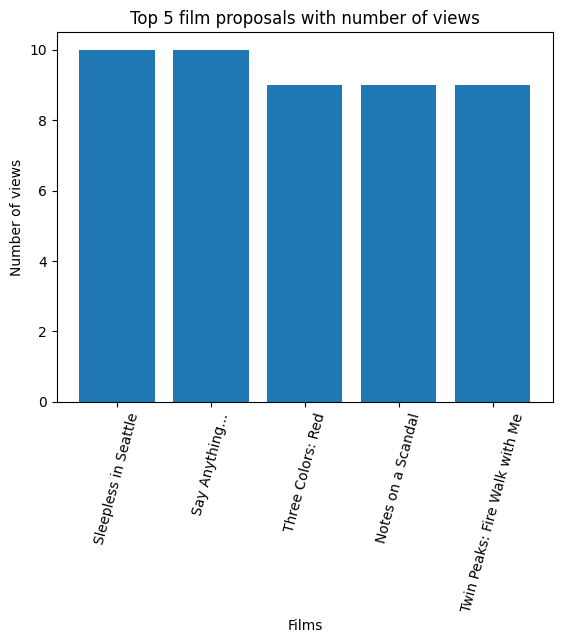

In [120]:
movie_recommendations_sorted = sorted(movie_recommendations.items(), key=lambda x: x[1], reverse=True)[:5]
print(movie_recommendations_sorted)

films = [f for f, s in movie_recommendations_sorted]
scores = [s for f, s in movie_recommendations_sorted]

plt.bar(films, scores)
plt.xlabel('Films')
plt.ylabel('Number of views')
plt.title('Top 5 film proposals with number of views')
plt.xticks(rotation=75)
plt.show()

# Part 4 Recommandation with views and rate

As using only the number of views may not be very accurate (lot of people can see a movie and rated it 1 star) we will calculate the top5 in a different way. 

Each view will be represented by its rating, so a good rating will be more impactful.

{'Star Wars': 18.0, 'The Dark': 17.0, 'Jarhead': 19.0, '2001: A Space Odyssey': 13.5, 'Armageddon': 14.0, 'Lock, Stock and Two Smoking Barrels': 5.0, 'Open Hearts': 2.0, 'Back to the Future': 9.5, 'Three Colors: Red': 34.0, 'Scarface': 19.0, 'Donnie Darko': 7.0, '48 Hrs.': 21.0, 'Lost in Translation': 12.0, "Breakfast at Tiffany's": 16.0, 'Ali: Fear Eats the Soul': 10.0, 'Man of Marble': 9.0, 'Stand by Me': 14.0, 'Willy Wonka & the Chocolate Factory': 9.0, 'Live and Let Die': 22.0, 'The 39 Steps': 36.0, 'Cat on a Hot Tin Roof': 5.0, 'Lili Marleen': 10.0, 'Fargo': 1.0, 'Terminator 3: Rise of the Machines': 44.5, 'Catwoman': 5.0, 'Grill Point': 21.0, 'Grbavica: The Land of My Dreams': 2.0, 'Jurassic Park': 5.5, 'Eyes Wide Shut': 9.0, 'The Devil Wears Prada': 8.0, 'A Nightmare on Elm Street': 22.0, "Miller's Crossing": 4.0, 'To Catch a Thief': 8.5, 'Mala Noche': 7.0, 'La Strada': 3.0, 'The Life Aquatic with Steve Zissou': 2.0, "Summer '04": 7.0, 'Aliens vs Predator: Requiem': 18.5, 'Human

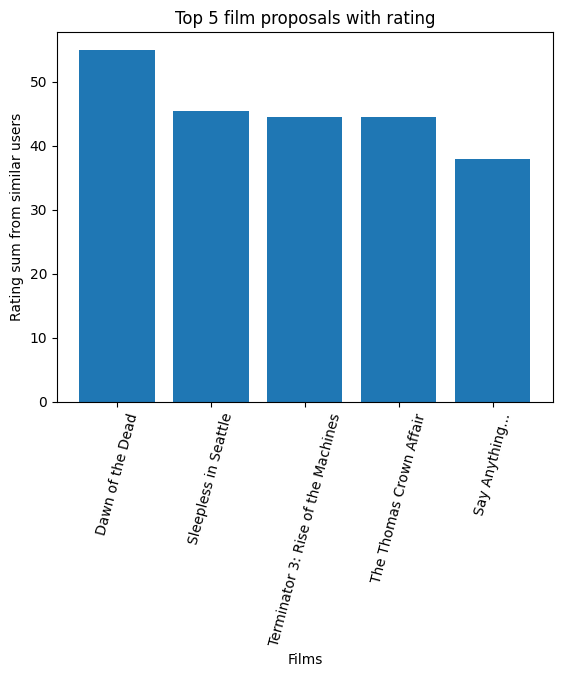

In [121]:
def get_proposed_films(user):
    """
    Get a list of films rated by the user.
    
    """
    films_user=data[data['userName']==user]['title'].tolist()
    film_ratings = {}
        
    for other in users_selected:
        user_films = data[data['userName'] == other[0]][['title', 'rating']]
        for _, row in user_films.iterrows():
            film = row['title']
            rating = row['rating']
            if film not in films_user:  
                if film not in film_ratings:
                    film_ratings[film] = rating
                else:
                    film_ratings[film]= film_ratings[film]+rating
    print(film_ratings)
    
    
    sorted_films = sorted(film_ratings.items(), key=lambda x: x[1], reverse=True)
    return sorted_films

film_proposals = get_proposed_films(user)[:5]
print("Recommended films:")
for film in film_proposals:
    print(film)


films = [f for f, s in film_proposals]
scores = [s for f, s in film_proposals]

plt.bar(films, scores)
plt.xlabel('Films')
plt.ylabel('Rating sum from similar users')
plt.title('Top 5 film proposals with rating')
plt.xticks(rotation=75)
plt.show()